### How quantity of reports by hour has changed over the years

/var/folders/10/47zlqxyn223g77dzxfbrgjy40000gn/T/ipykernel_9996/1887090302.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  full_animal_report = pd.read_csv('/Users/shivam_goyal/Desktop/CS506/animal_new/ds-boston-311-animal-reports/sp24-team-a/data/FullAnimalReports.csv')


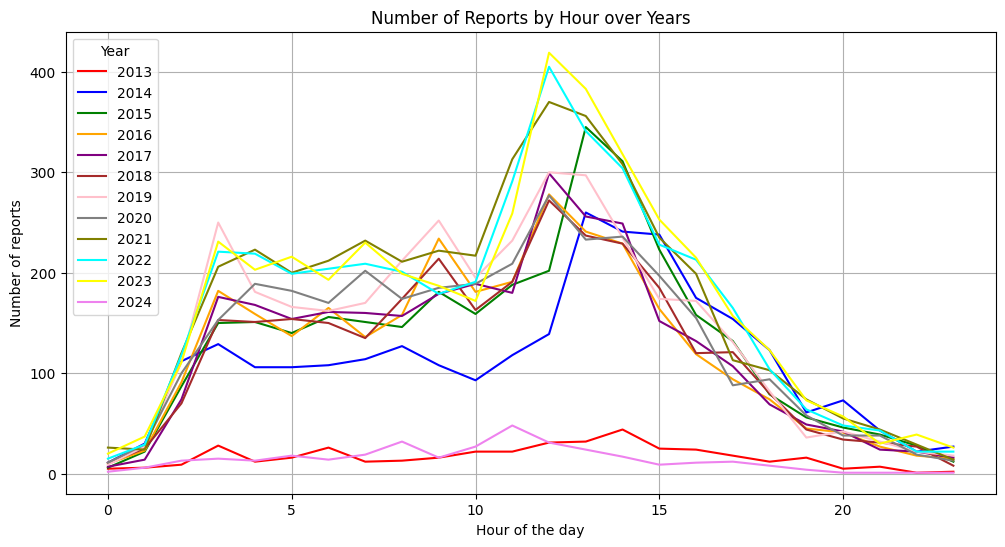

Hour 0: Max reports - 26, Years: 2021
Hour 1: Max reports - 37, Years: 2023
Hour 2: Max reports - 120, Years: 2021
Hour 3: Max reports - 250, Years: 2019
Hour 4: Max reports - 223, Years: 2021
Hour 5: Max reports - 216, Years: 2023
Hour 6: Max reports - 212, Years: 2021
Hour 7: Max reports - 232, Years: 2021
Hour 8: Max reports - 212, Years: 2019
Hour 9: Max reports - 252, Years: 2019
Hour 10: Max reports - 217, Years: 2021
Hour 11: Max reports - 313, Years: 2021
Hour 12: Max reports - 419, Years: 2023
Hour 13: Max reports - 383, Years: 2023
Hour 14: Max reports - 318, Years: 2023
Hour 15: Max reports - 253, Years: 2023
Hour 16: Max reports - 215, Years: 2023
Hour 17: Max reports - 165, Years: 2022
Hour 18: Max reports - 123, Years: 2014, 2023
Hour 19: Max reports - 74, Years: 2021
Hour 20: Max reports - 73, Years: 2014
Hour 21: Max reports - 44, Years: 2021
Hour 22: Max reports - 39, Years: 2023
Hour 23: Max reports - 27, Years: 2014


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataframe full_animal_report here
full_animal_report = pd.read_csv('/Users/shivam_goyal/Desktop/CS506/animal_new/ds-boston-311-animal-reports/sp24-team-a/data/FullAnimalReports.csv')

# Step 1: Convert 'open_dt' column to datetime type
full_animal_report['open_dt'] = pd.to_datetime(full_animal_report['open_dt'])

# Step 2: Extract year and hour
full_animal_report['year'] = full_animal_report['open_dt'].dt.year
full_animal_report['hour'] = full_animal_report['open_dt'].dt.hour

# Step 3: Group by year and hour, and count the number of reports
reports_by_year_hour = full_animal_report.groupby(['year', 'hour']).size().reset_index(name='report_count')

# Plotting
plt.figure(figsize=(12, 6))

# Define individual colors for each year
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan','yellow', 'violet']

# Check if the number of colors matches the number of unique years
num_years = len(reports_by_year_hour['year'].unique())
if num_years > len(colors):
    raise ValueError("Number of unique years exceeds the number of specified colors.")

# Iterate over each year and assign a color
for i, year in enumerate(reports_by_year_hour['year'].unique()):
    year_data = reports_by_year_hour[reports_by_year_hour['year'] == year]
    plt.plot(year_data['hour'], year_data['report_count'], label=str(year), color=colors[i])

# Adding labels and title
plt.xlabel('Hour of the day')
plt.ylabel('Number of reports')
plt.title('Number of Reports by Hour over Years')
plt.legend(title='Year', loc='upper left')

# Display the plot
plt.grid(True)
plt.show()

# Find the maximum number of reports for each hour
max_reports_per_hour = reports_by_year_hour.groupby('hour')['report_count'].max()

# Initialize an empty list to store the years with maximum reports
years_with_max_reports = []

# Iterate over each hour to find the years with maximum reports
for hour, max_reports in max_reports_per_hour.items():
    # Filter the dataframe to get the rows corresponding to the maximum reports for this hour
    max_reports_data = reports_by_year_hour[(reports_by_year_hour['hour'] == hour) & (reports_by_year_hour['report_count'] == max_reports)]
    # Get the years with maximum reports for this hour and append to the list
    years_with_max_reports.extend(max_reports_data['year'].tolist())

# Remove duplicate years
years_with_max_reports = list(set(years_with_max_reports))

# Print the list of years with maximum reports for each hour
for hour, max_reports in max_reports_per_hour.items():
    max_reports_data = reports_by_year_hour[(reports_by_year_hour['hour'] == hour) & (reports_by_year_hour['report_count'] == max_reports)]
    years_str = ', '.join(str(year) for year in max_reports_data['year'])
    print(f"Hour {hour}: Max reports - {max_reports}, Years: {years_str}")




In [11]:
full_animal_report = pd.read_csv('/Users/shivam_goyal/Desktop/CS506/animal_new/ds-boston-311-animal-reports/sp24-team-a/data/FullAnimalReports.csv')
full_animal_report.columns

/var/folders/10/47zlqxyn223g77dzxfbrgjy40000gn/T/ipykernel_9996/3459143176.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  full_animal_report = pd.read_csv('/Users/shivam_goyal/Desktop/CS506/animal_new/ds-boston-311-animal-reports/sp24-team-a/data/FullAnimalReports.csv')


Index(['case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submitted_photo', 'closed_photo',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'geom_4326', 'source'],
      dtype='object')

### Network Analysis:

- Created a network graph where departments and neighborhoods are nodes, and interactions are edges.
- Analyzed network metrics such as centrality to identify important departments or neighborhoods in the network.
- Visualized the network graph to understand the connections between departments and neighborhoods.

/var/folders/10/47zlqxyn223g77dzxfbrgjy40000gn/T/ipykernel_9996/1068820655.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/shivam_goyal/Desktop/CS506/animal_new/ds-boston-311-animal-reports/sp24-team-a/data/FullAnimalReports.csv')


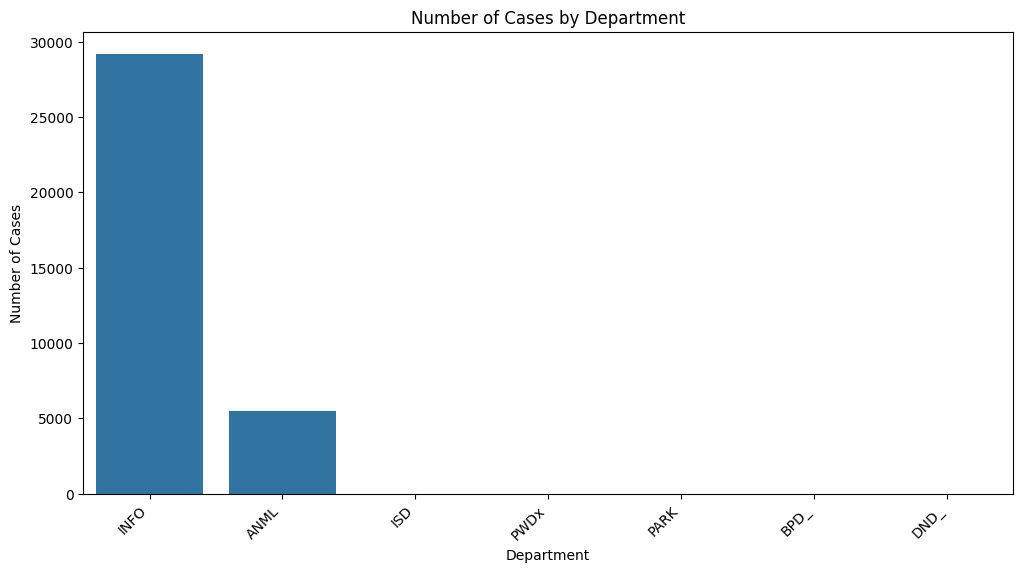

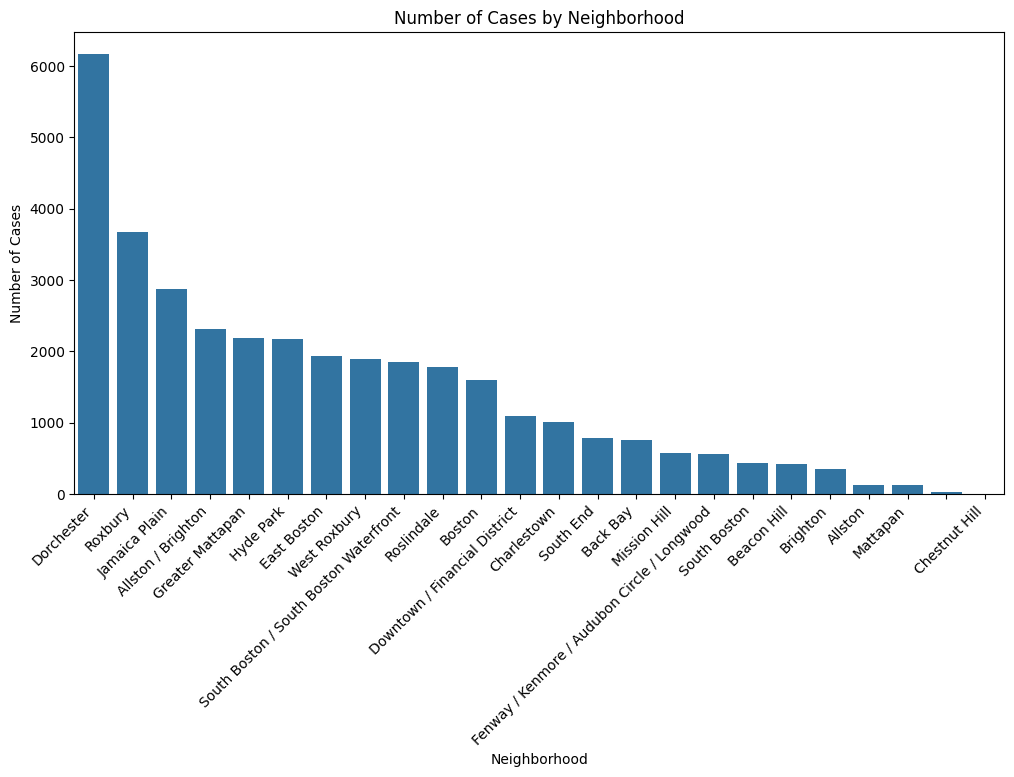

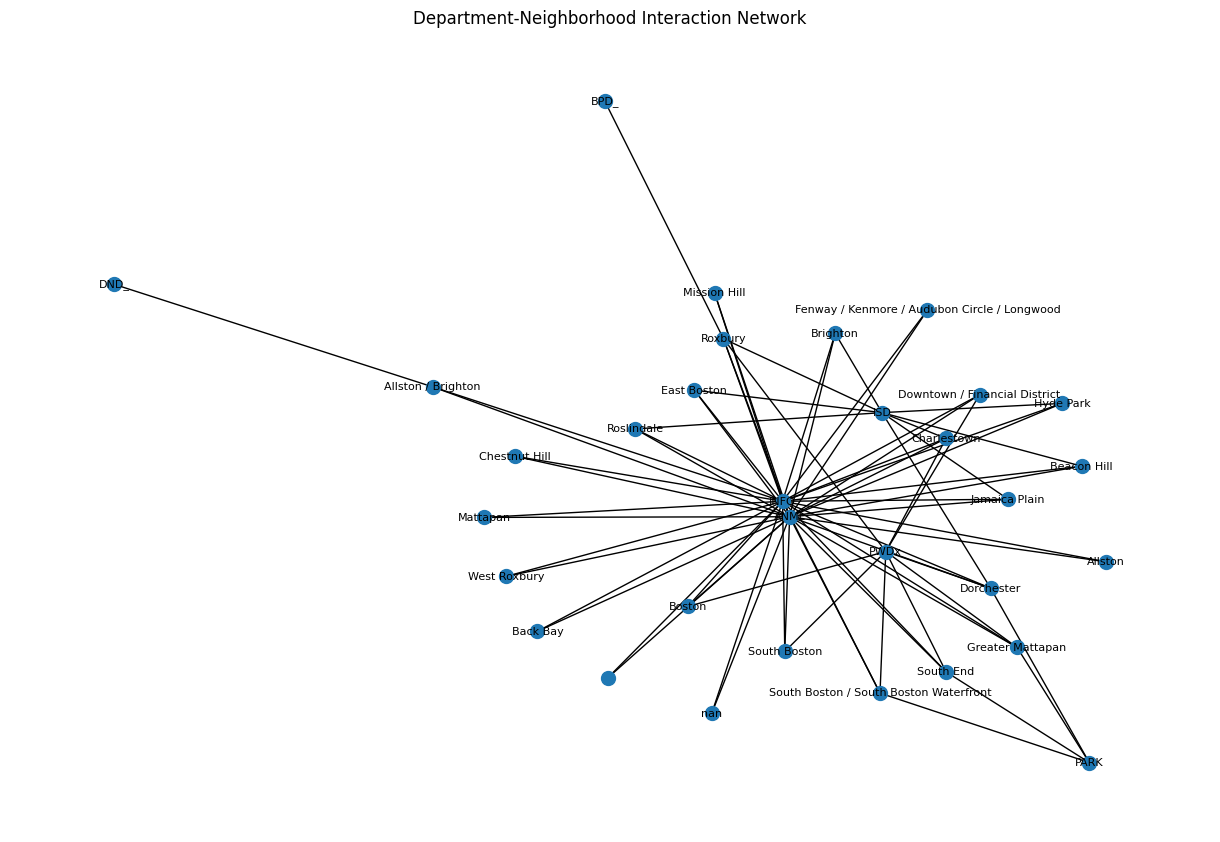

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Load the dataset
df = pd.read_csv('/Users/shivam_goyal/Desktop/CS506/animal_new/ds-boston-311-animal-reports/sp24-team-a/data/FullAnimalReports.csv')

# Convert date-time columns to datetime objects
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])

# Exploratory Data Analysis (EDA)
# Number of cases by department
cases_by_department = df['department'].value_counts()

# Number of cases by neighborhood
cases_by_neighborhood = df['neighborhood'].value_counts()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=cases_by_department.index, y=cases_by_department.values)
plt.title('Number of Cases by Department')
plt.xlabel('Department')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=cases_by_neighborhood.index, y=cases_by_neighborhood.values)
plt.title('Number of Cases by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.show()

# Network Analysis
# Create a network graph
G = nx.Graph()

# Add departments as nodes
departments = df['department'].unique()
G.add_nodes_from(departments, bipartite=0)

# Add neighborhoods as nodes
neighborhoods = df['neighborhood'].unique()
G.add_nodes_from(neighborhoods, bipartite=1)

# Add edges between departments and neighborhoods
for index, row in df.iterrows():
    # print(index)
    # print(row)
    department = row['department']
    neighborhood = row['neighborhood']
    if not G.has_edge(department, neighborhood):
        G.add_edge(department, neighborhood)

# Basic Network Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=100, with_labels=True, font_size=8)
plt.title('Department-Neighborhood Interaction Network')
plt.show()

# Network Analysis Metrics (Optional)
# Calculate network metrics such as centrality

# Statistical Analysis (Optional)
# Conduct statistical tests and correlation analysis
